** Save your ipython notebook with your name and push to bootcamp003_student**

## Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(1) Read [bnames.csv](http://nycdatascience.com/slides/BOOTCAMP2/content/classData/python/bnames.csv) and [births.csv](http://nycdatascience.com/slides/BOOTCAMP2/content/classData/python/births.csv) using Pandas (the data is downloadable and also in the exercise.zip). Then print out the first 5 rows.

In [2]:
!head -3 ./bnames.csv 

"year","name","prop","sex","soundex"
1880,"John",0.081541,"boy","J500"
1880,"William",0.080511,"boy","W450"


In [3]:
!head -3 ./births.csv

"year","sex","births"
"1880","boy",118405
"1881","boy",108290


In [28]:
bnames = pd.read_csv('bnames.csv')
births = pd.read_csv('births.csv')

print bnames.head()
print ""
print births.head()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

   year  sex  births
0  1880  boy  118405
1  1881  boy  108290
2  1882  boy  122034
3  1883  boy  112487
4  1884  boy  122745


(2) Create a table named 'bnames' in SQLite. Insert the DataFrame `bnames` into this table. Print out the first 5 rows.

In [7]:
import sqlite3
con = sqlite3.connect(':memory:')

query = """
CREATE TABLE bnames
    (year INTEGER, 
     name VARCHAR(20),
     prop FLOAT,
     sex VARCHAR(5),
     soundex VARCHAR(5));"""

con.execute(query)
con.commit()

stmt = "INSERT INTO bnames VALUES(?, ?, ?, ?, ?)"
con.executemany(stmt, bnames.values)
con.commit()

query2 = "SELECT * FROM bnames LIMIT 5"
con.execute(query2).fetchall()

[(1880, u'John', 0.081541, u'boy', u'J500'),
 (1880, u'William', 0.080511, u'boy', u'W450'),
 (1880, u'James', 0.050057, u'boy', u'J520'),
 (1880, u'Charles', 0.045167, u'boy', u'C642'),
 (1880, u'George', 0.043292000000000004, u'boy', u'G620')]

(3) 

- a. How many times did a `name` reach a `prop` greater than 0.01 after the `year` 2000?
- b. Find all of the girls born in 1900 or 2000.

In [16]:
print "Name w/ prop > .01 after 2000: %i" %len(bnames[(bnames.prop > .01) & (bnames.year > 2000)])
print "Girls born in 1900 or 2000:"
bnames[(bnames.sex == "girl") & (bnames.year.isin([1900, 2000]))]

Name w/ prop > .01 after 2000: 57
Girls born in 1900 or 2000:


,year,name,prop,sex,soundex
149000,1900,Mary,0.052567,girl,M600
149001,1900,Helen,0.019953,girl,H450
149002,1900,Anna,0.019236,girl,A500
149003,1900,Margaret,0.016688,girl,M626
149004,1900,Ruth,0.014989,girl,R300
149005,1900,Elizabeth,0.012888,girl,E421
149006,1900,Florence,0.012331,girl,F465
149007,1900,Ethel,0.012255,girl,E340
149008,1900,Marie,0.012133,girl,M600
149009,1900,Lillian,0.010739,girl,L450


(4) 

- a. Extract your name from the dataset bnames, then sort by the column `year`. Print out the first 5 rows.
- b. Plot the trend of `prop` over `year`.

In [22]:
joseph = bnames[(bnames.name == 'Joseph') & (bnames.sex == 'boy')].sort(columns='year')
joseph.head(5)

,year,name,prop,sex,soundex
6,1880,Joseph,0.022229,boy,J210
1006,1881,Joseph,0.022679,boy,J210
2006,1882,Joseph,0.021879,boy,J210
3006,1883,Joseph,0.022367,boy,J210
4006,1884,Joseph,0.022062,boy,J210


(0, 0.03)

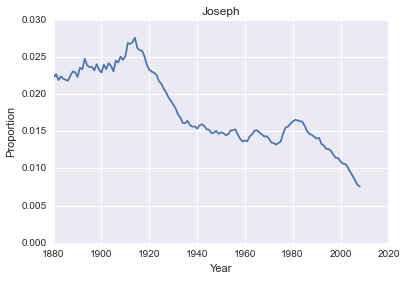

In [24]:
plt.plot(joseph.year, joseph.prop)
plt.title("Joseph")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.ylim(0, 0.03)

(5) 

- a. Create a new DataFrame names `bnames2` which combines `bnames` and `birth` together. (using the `left` merge, and put `bnames` on the left).
- b. Add a new column named `num` which is the product of column `prop` and column `births`(using the function `np.round` to convert to int).

In [36]:
print bnames.head()
print births.head()
bnames2 = bnames.merge(births, how='left')
bnames2['num'] = np.round(bnames2['prop'] * bnames2['births'])
print bnames2.head()
print bnames2.tail()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620
   year  sex  births
0  1880  boy  118405
1  1881  boy  108290
2  1882  boy  122034
3  1883  boy  112487
4  1884  boy  122745
   year     name      prop  sex soundex  births   num
0  1880     John  0.081541  boy    J500  118405  9655
1  1880  William  0.080511  boy    W450  118405  9533
2  1880    James  0.050057  boy    J520  118405  5927
3  1880  Charles  0.045167  boy    C642  118405  5348
4  1880   George  0.043292  boy    G620  118405  5126
        year      name      prop   sex soundex   births  num
257995  2008  Carleigh  0.000128  girl    C642  2072756  265
257996  2008     Iyana  0.000128  girl    I500  2072756  265
257997  2008    Kenley  0.000127  girl    K540  2072756  263
257998  2008    Sloane  0.000127  girl    S450  2072756  263
25799

(6) Answer following questions using the new DataFrame `bnames2`.

- a. Calculate the total number of babies in each soundex. What is the most popular soundex?
- b. Calculate the total number of boys and the total number of girls for each year.

In [40]:
print bnames2.groupby('soundex').sum()[['births']].sort(columns='births', ascending=False) 
print "Soundex J500 has the most births"

             births
soundex            
J500     6336292208
D500     4739584746
L500     2972635482
L200     2801532738
J200     2637888359
R200     2536685375
T500     2421810324
S500     2347888490
C623     2151593748
C640     2055258056
E420     1994453252
R500     1899126331
M650     1891136324
K400     1878350593
M240     1810825500
M620     1803808673
M600     1795301885
C600     1779822036
L400     1779773359
B653     1739663618
F652     1722405323
K623     1685587063
B650     1670675327
A420     1659510137
M200     1636732371
T600     1530260916
A500     1522470596
R240     1516614061
T620     1484831687
A450     1478299169
...             ...
E552         124902
E610         124902
H521         122034
W524         122034
A150         121045
T643         121045
L416         119046
A534         119044
G165         119044
R355         119044
J120         118405
T435         118405
F653         118405
O612         115948
D660         115948
Z520         115948
W640         115948


(7) 

- a. Load the Gross Domestic Product data for the 190 ranked countries in the file `GDP.csv`. Load `Country.csv` into a DataFrame. 
- b. Match the data based on the country shortcode. How many of the IDs match? 
- c. Sort the data frame in descending order by GDP rank. What is the 13th country in the resulting data frame? 
- d. What is the average GDP for the "High income: OECD" and "High income: nonOECD" group?   (Note: GDP formats as 123,456,789.)
- e. What is the average GDP for different income groups and regions?

In [44]:
### you can use the following function to have a look at the data
def readFile(path):
    with open(path) as f:
        i = 1
        for line in f:
            print i, ':', line
            i += 1

In [45]:
readFile('./GDP.csv')

1 : ,Gross domestic product 2012,,,,,,,,

2 : ,,,,,,,,,

3 : ,,,,(millions of,,,,,

4 : ,Ranking,,Economy,US dollars),,,,,

5 : ,,,,,,,,,

6 : USA,1,,United States," 16,244,600 ",,,,,

7 : CHN,2,,China," 8,227,103 ",,,,,

8 : JPN,3,,Japan," 5,959,718 ",,,,,

9 : DEU,4,,Germany," 3,428,131 ",,,,,

10 : FRA,5,,France," 2,612,878 ",,,,,

11 : GBR,6,,United Kingdom," 2,471,784 ",,,,,

12 : BRA,7,,Brazil," 2,252,664 ",,,,,

13 : RUS,8,,Russian Federation," 2,014,775 ",,,,,

14 : ITA,9,,Italy," 2,014,670 ",,,,,

15 : IND,10,,India," 1,841,710 ",,,,,

16 : CAN,11,,Canada," 1,821,424 ",,,,,

17 : AUS,12,,Australia," 1,532,408 ",,,,,

18 : ESP,13,,Spain," 1,322,965 ",,,,,

19 : MEX,14,,Mexico," 1,178,126 ",,,,,

20 : KOR,15,,"Korea, Rep."," 1,129,598 ",,,,,

21 : IDN,16,,Indonesia," 878,043 ",,,,,

22 : TUR,17,,Turkey," 789,257 ",,,,,

23 : NLD,18,,Netherlands," 770,555 ",,,,,

24 : SAU,19,,Saudi Arabia," 711,050 ",,,,,

25 : CHE,20,,Switzerland," 631,173 ",,,,,

26 : SWE,21,,Sweden," 523,806 "

In [56]:
gdp = pd.read_csv('GDP.csv', header=None, skiprows=range(5), names=['CountryCode', 'Rank', 'col2', 'Country',
                                                                    'GDP', 'col5', 'col6', 'col7',
                                                                    'col8', 'col9'], thousands=',')
gdp = gdp.drop(gdp.columns[[2, 5, 6, 7, 8, 9]], axis=1)
gdp = gdp.dropna(subset=['CountryCode','Rank'])
gdp['GDP'] = gdp['GDP'].replace({',': ''}, regex=True).apply(int)
gdp

,CountryCode,Rank,Country,GDP
0,USA,1,United States,16244600
1,CHN,2,China,8227103
2,JPN,3,Japan,5959718
3,DEU,4,Germany,3428131
4,FRA,5,France,2612878
5,GBR,6,United Kingdom,2471784
6,BRA,7,Brazil,2252664
7,RUS,8,Russian Federation,2014775
8,ITA,9,Italy,2014670
9,IND,10,India,1841710


In [46]:
readFile('./Country.csv')

1 : CountryCode,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,National accounts base year,National accounts reference year,System of National Accounts,SNA price valuation,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name

2 : ABW,Aruba,High income: nonOECD,Latin America & Caribbean,,,Aruban florin,2000,,,1995,,,,,,,,Special,,,,,,,2008,,AW,AW,Aruba,Aruba

3 : ADO,Principality of Andorra,High income: nonOECD,Europe & Central Asia,,,Euro,Register based,,,,,,,,,,,General,,,,Yes,,,2006,,AD,AD,Andorra,Andorra

4 : AFG,Islamic State of Afghanistan,Low

In [60]:
country = pd.read_csv('Country.csv')
country

,CountryCode,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,ABW,Aruba,High income: nonOECD,Latin America & Caribbean,NaN,NaN,Aruban florin,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,2008,NaN,AW,AW,Aruba,Aruba
1,ADO,Principality of Andorra,High income: nonOECD,Europe & Central Asia,NaN,NaN,Euro,Register based,NaN,NaN,...,NaN,Yes,NaN,NaN,2006,NaN,AD,AD,Andorra,Andorra
2,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"MICS, 2003",Fiscal year end: March 20; reporting period fo...,...,NaN,NaN,NaN,NaN,2008,2000,AF,AF,Afghanistan,Afghanistan
3,AGO,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,IDA,NaN,Angolan kwanza,1970,"MICS, 2001, MIS, 2006/07",NaN,...,"IHS, 2000",NaN,1964-65,NaN,1991,2000,AO,AO,Angola,Angola
4,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2001,"MICS, 2005",NaN,...,"LSMS, 2005",Yes,1998,2005,2008,2000,AL,AL,Albania,Albania
5,ARE,United Arab Emirates,High income: nonOECD,Middle East & North Africa,NaN,NaN,U.A.E. dirham,2005,NaN,NaN,...,NaN,NaN,1998,NaN,2008,2005,AE,AE,United Arab Emirates,United Arab Emirates
6,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,IBRD,NaN,Argentine peso,2001,NaN,NaN,...,"IHS, 2006",Yes,2002,2001,2008,2000,AR,AR,Argentina,Argentina
7,ARM,Republic of Armenia,Lower middle income,Europe & Central Asia,Blend,NaN,Armenian dram,2001,"DHS, 2005",NaN,...,"IHS, 2007",Yes,NaN,NaN,2008,2000,AM,AM,Armenia,Armenia
8,ASM,American Samoa,Upper middle income,East Asia & Pacific,NaN,NaN,U.S. dollar,2000,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,AS,AS,American Samoa,American Samoa
9,ATG,Antigua and Barbuda,Upper middle income,Latin America & Caribbean,IBRD,NaN,East Caribbean dollar,2001,NaN,The government has revised national accounts d...,...,NaN,Yes,NaN,NaN,2007,1990,AG,AG,Antigua and Barbuda,Antigua and Barbuda


In [63]:
countrygdpdata = gdp.merge(country, how='inner')
print countrygdpdata
print "189 matches in both tables"

    CountryCode Rank                         Country       GDP  \
0           USA    1                   United States  16244600   
1           CHN    2                           China   8227103   
2           JPN    3                           Japan   5959718   
3           DEU    4                         Germany   3428131   
4           FRA    5                          France   2612878   
5           GBR    6                  United Kingdom   2471784   
6           BRA    7                          Brazil   2252664   
7           RUS    8              Russian Federation   2014775   
8           ITA    9                           Italy   2014670   
9           IND   10                           India   1841710   
10          CAN   11                          Canada   1821424   
11          AUS   12                       Australia   1532408   
12          ESP   13                           Spain   1322965   
13          MEX   14                          Mexico   1178126   
14        

In [65]:
countrygdpdata.sort(columns='GDP', ascending=False).iloc[12]

CountryCode                                                                                        ESP
Rank                                                                                                13
Country                                                                                          Spain
GDP                                                                                            1322965
Long Name                                                                             Kingdom of Spain
Income Group                                                                         High income: OECD
Region                                                                           Europe & Central Asia
Lending category                                                                                   NaN
Other groups                                                                                 Euro area
Currency Unit                                                            

In [69]:
print countrygdpdata.groupby('Income Group').mean()[['GDP']]
print ""
print "High Income OECD $1,483,917"
print "High Income Non OECD $104,349"

                                 GDP
Income Group                        
High income: OECD     1483917.133333
High income: nonOECD   104349.826087
Low income              14410.783784
Lower middle income    256663.481481
Upper middle income    231847.844444

High Income OECD $1,483,917
High Income Non OECD $104,349


In [70]:
print countrygdpdata.groupby(['Region', 'Income Group']).mean()[['GDP']]

                                                            GDP
Region                     Income Group                        
East Asia & Pacific        High income: OECD     2197267.750000
                           High income: nonOECD   149624.000000
                           Low income               8154.666667
                           Lower middle income    660466.533333
                           Upper middle income    103056.333333
Europe & Central Asia      High income: OECD      756704.434783
                           High income: nonOECD    27766.600000
                           Low income               6723.500000
                           Lower middle income     43140.285714
                           Upper middle income    269618.538462
Latin America & Caribbean  High income: nonOECD    27954.800000
                           Low income               7843.000000
                           Lower middle income     27106.666667
                           Upper middle 